In [2]:
# Importing libraries

import requests
from datetime import datetime
import traceback
import json
import sys
import praw
import pandas as pd
import time

In [2]:
# Scraping data for subreddit "r/emacs" [01/01/2020 - 03/01/2020]

def downloadSubreddit(filename, subreddit, start_time, end_time):
    submissions = []
    count = 0
    submissions_with_metrics = []
    previous_epoch = int(start_time.timestamp())
    after_epoch = int(end_time.timestamp())
    print(after_epoch)
    print(previous_epoch)
    
    
    url = 'https://api.pushshift.io/reddit/submission/search/?subreddit={}&after={}&before={}&sort=desc&limit=1000'
    reddit = praw.Reddit(client_id='_87SCviJLvIICA', client_secret='yio0cnfuq97lMDQRPfvXSfje-O-z_Q', user_agent='redditdataanalysis')
    
    while True:
        new_url = url.format(subreddit, after_epoch, previous_epoch)
        json_text = requests.get(new_url, headers={'User-Agent': "Post downloader by /u/nsajnani"})
        time.sleep(1)  # pushshift has a rate limit, if we send requests too fast it will start returning error messages
        try:
            json_data = json_text.json()
        except json.decoder.JSONDecodeError:
            time.sleep(1)
            continue

        if 'data' not in json_data:
            break
        objects = json_data['data']
        if len(objects) == 0:
            break

        for object in objects:
            previous_epoch = object['created_utc'] - 1
            count += 1
            praw_submission = reddit.submission(id=object['id'])
            submissions_with_metrics.append([praw_submission.author, praw_submission.title, praw_submission.upvote_ratio, praw_submission.is_original_content, praw_submission.edited, praw_submission.score, praw_submission.id, praw_submission.subreddit, praw_submission.url, praw_submission.num_comments, praw_submission.selftext, praw_submission.created])


        print("Saved {} submissions through {}".format(count, datetime.fromtimestamp(previous_epoch).strftime("%Y-%m-%d")))

    print(f"Saved {count} submissions")
    submissions_with_metrics = pd.DataFrame(submissions_with_metrics,columns=['author','title', 'upvote_ratio','is_original_content','edited','score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
    submissions_with_metrics.to_csv(filename, index=False)


downloadSubreddit("submissions_with_metrics_emacs.csv", "emacs", datetime(2020, 3, 1), datetime(2020, 1, 1))


1577817000
1583001000
Saved 100 submissions through 2020-02-23
Saved 200 submissions through 2020-02-16
Saved 300 submissions through 2020-02-09
Saved 400 submissions through 2020-02-01
Saved 500 submissions through 2020-01-27
Saved 600 submissions through 2020-01-21
Saved 700 submissions through 2020-01-14
Saved 800 submissions through 2020-01-07
Saved 900 submissions through 2020-01-01
Saved 903 submissions through 2020-01-01
Saved 903 submissions


In [3]:
# Scraping data for subreddit "r/vim" [01/01/2020 - 03/01/2020]

def downloadSubreddit(filename, subreddit, start_time, end_time):
    submissions = []
    count = 0
    submissions_with_metrics = []
    previous_epoch = int(start_time.timestamp())
    after_epoch = int(end_time.timestamp())
    print(after_epoch)
    print(previous_epoch)
    
    
    url = 'https://api.pushshift.io/reddit/submission/search/?subreddit={}&after={}&before={}&sort=desc&limit=1000'
    reddit = praw.Reddit(client_id='_87SCviJLvIICA', client_secret='yio0cnfuq97lMDQRPfvXSfje-O-z_Q', user_agent='redditdataanalysis')
    
    while True:
        new_url = url.format(subreddit, after_epoch, previous_epoch)
        json_text = requests.get(new_url, headers={'User-Agent': "Post downloader by /u/nsajnani"})
        time.sleep(1)  # pushshift has a rate limit, if we send requests too fast it will start returning error messages
        try:
            json_data = json_text.json()
        except json.decoder.JSONDecodeError:
            time.sleep(1)
            continue

        if 'data' not in json_data:
            break
        objects = json_data['data']
        if len(objects) == 0:
            break

        for object in objects:
            previous_epoch = object['created_utc'] - 1
            count += 1
            praw_submission = reddit.submission(id=object['id'])
            submissions_with_metrics.append([praw_submission.author, praw_submission.title, praw_submission.upvote_ratio, praw_submission.is_original_content, praw_submission.edited, praw_submission.score, praw_submission.id, praw_submission.subreddit, praw_submission.url, praw_submission.num_comments, praw_submission.selftext, praw_submission.created])


        print("Saved {} submissions through {}".format(count, datetime.fromtimestamp(previous_epoch).strftime("%Y-%m-%d")))

    print(f"Saved {count} submissions")
    submissions_with_metrics = pd.DataFrame(submissions_with_metrics,columns=['author','title', 'upvote_ratio','is_original_content','edited','score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
    submissions_with_metrics.to_csv(filename, index=False)


downloadSubreddit("submissions_with_metrics_vim.csv", "vim", datetime(2020, 3, 1), datetime(2020, 1, 1))


1577817000
1583001000
Saved 100 submissions through 2020-02-22
Saved 200 submissions through 2020-02-14
Saved 300 submissions through 2020-02-06
Saved 400 submissions through 2020-01-28
Saved 500 submissions through 2020-01-21
Saved 600 submissions through 2020-01-13
Saved 700 submissions through 2020-01-04
Saved 733 submissions through 2020-01-01
Saved 733 submissions


In [3]:
# Reading CSV files into dataframes

df_emacs = pd.read_csv("submissions_with_metrics_emacs.csv") 
df_vim = pd.read_csv("submissions_with_metrics_vim.csv")

In [4]:
print("Data for subreddit 'emacs'")
df_emacs.head()

Data for subreddit 'emacs'


,author,title,upvote_ratio,is_original_content,edited,score,id,subreddit,url,num_comments,body,created
0,NaN,"Emacs 27, org mode undesired pair for <.",1.00,False,False,14,fbggoy,emacs,https://www.reddit.com/r/emacs/comments/fbggoy...,11,[deleted],1.583029e+09
1,lorawpreisserwp,New Videos,1.00,False,False,1,fbe0ps,emacs,https://tube-casino.com/,0,NaN,1.583019e+09
2,bhanuvrat,Can mu server be configured to use more than o...,0.91,False,False,9,fbd8rt,emacs,https://www.reddit.com/r/emacs/comments/fbd8rt...,11,Hi \n\nI found mu4e struggling to search throu...,1.583015e+09
3,NaN,[REQUEST] Can anyone port Rouge to Emacs?,0.56,False,False,1,fbbooz,emacs,https://www.reddit.com/r/emacs/comments/fbbooz...,5,&#x200B;\n\nhttps://preview.redd.it/wqk50urotu...,1.583007e+09
4,fctorial,Smooth scrolling in emacs,0.87,False,False,19,fbb83r,emacs,https://www.reddit.com/r/emacs/comments/fbb83r...,2,Is there any way to have emacs scroll text buf...,1.583004e+09


In [5]:
print("Data for subreddit 'vim'")
df_vim.head()

Data for subreddit 'vim'


,author,title,upvote_ratio,is_original_content,edited,score,id,subreddit,url,num_comments,body,created
0,dog_superiority,Menu for selecting buffer?,0.86,False,False,5,fbdbja,vim,https://www.reddit.com/r/vim/comments/fbdbja/m...,11,"I thought I was able to do this in the past, b...",1.583016e+09
1,axvr,Zepl.vim: A lightweight REPL integration plugi...,0.93,False,1583021012.0,53,fbc6l1,vim,https://www.reddit.com/r/vim/comments/fbc6l1/z...,21,"Over the past couple of weeks, I've been worki...",1.583010e+09
2,NaN,Zepl.vim: A lightweight REPL integration plugi...,1.00,False,False,1,fbc69p,vim,https://www.reddit.com/r/vim/comments/fbc69p/z...,0,[deleted],1.583010e+09
3,NaN,Zepl.vim: A lightweight REPL integration plugi...,1.00,False,False,1,fbc4l6,vim,https://www.reddit.com/r/vim/comments/fbc4l6/z...,0,[deleted],1.583010e+09
4,Segeljaktus,vim-isotope 2.0 - Insert and attach special ch...,0.96,False,1582986672.0,67,fbbna6,vim,https://www.reddit.com/r/vim/comments/fbbna6/v...,9,&#x200B;\n\nhttps://preview.redd.it/i23jcg0iiv...,1.583007e+09


Length of Data (emacs) : 903
Length of Data (vim) : 733


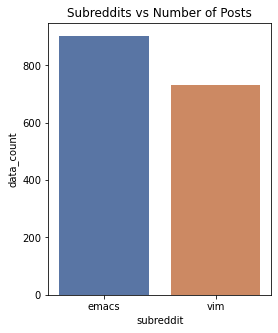

In [6]:
print("Length of Data (emacs) : " + str(len(df_emacs)))
print("Length of Data (vim) : " + str(len(df_vim)))

data = [['emacs', len(df_emacs)], ['vim', len(df_vim)]] 
df = pd.DataFrame(data, columns = ['subreddit', 'data_count'])

# Plotting number of posts in subreddits emacs and vim 

from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,5))
ax = sns.barplot(x="subreddit", y="data_count", data=df, palette="deep").set_title("Subreddits vs Number of Posts")

Number of Distinct Authors in 'emacs' : 470
Number of Distinct Authors in 'vim'   : 437


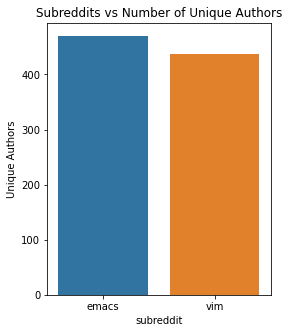

In [7]:
print("Number of Distinct Authors in 'emacs' : " + str(df_emacs['author'].nunique()))
print("Number of Distinct Authors in 'vim'   : " + str(df_vim['author'].nunique()))

data = [['emacs', df_emacs['author'].nunique()], ['vim', df_vim['author'].nunique()]] 
df = pd.DataFrame(data, columns = ['subreddit', 'Unique Authors'])

# Plotting number of posts in subreddits emacs and vim 

from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,5))
ax = sns.barplot(x="subreddit", y="Unique Authors", data=df).set_title("Subreddits vs Number of Unique Authors")

Highest number of comments on emacs posts : 170


Text(0.5, 1.0, 'EMACS - Distribution of comments')

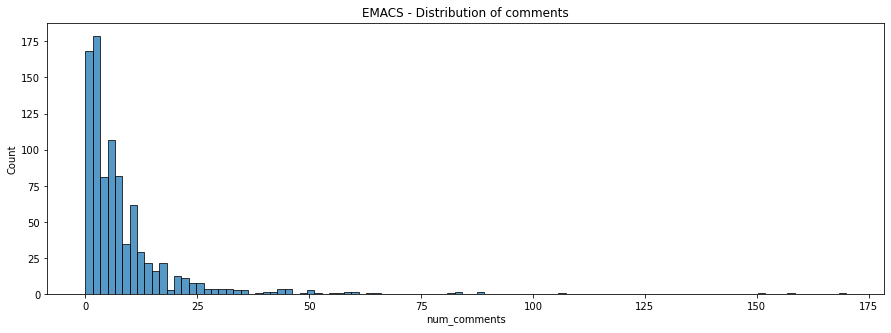

In [22]:
# Comments distribution in emacs subreddit

print("Highest number of comments on emacs posts : " + str(max(df_emacs['num_comments'])))

plt.figure(figsize=(15,5))
sns.histplot(data=df_emacs, x="num_comments").set_title("EMACS - Distribution of comments")

Highest number of comments on vim Posts : 195


Text(0.5, 1.0, 'VIM - Distribution of comments')

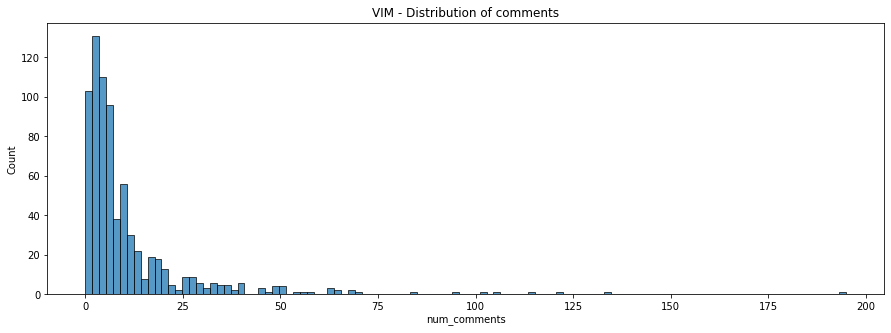

In [33]:
# Comments distribution in vim subreddit

import numpy as np

print("Highest number of comments on vim Posts : " + str(max(df_vim['num_comments'])))

plt.figure(figsize=(15,5))
sns.histplot(data=df_vim, x="num_comments").set_title("VIM - Distribution of comments")